In [64]:
%matplotlib inline

In [65]:
from __future__ import print_function

import datetime
import copy
import math

import scipy.stats
import numpy as np
import cartopy
import cartopy.crs as ccrs
import matplotlib
import matplotlib.pyplot as plt
import toml

In [66]:
# svg font import
plt.rcParams.update({'text.usetex': False,"svg.fonttype": 'none'})

In [67]:
with open('data_sites.toml') as stat_file:
    sites = toml.load(stat_file)

# dt_until = datetime.datetime(2010,10,1)

# data_str = 'Data: Mar 2017'
# dt_until = datetime.datetime(2017,3,1)
# data_str = 'Data: Oct 2018'
# dt_until = datetime.datetime(2018,10,1)
data_str = 'Data: Jan 2019'
dt_until = datetime.datetime(2019,1,1)
# data_str = 'Data: Oct 2021'
# dt_until = datetime.datetime(2021,10,1)
fn_prefix = dt_until.strftime('%Y-%m_')

data_str = 'Data: Dec 2021'
dt_until = datetime.datetime(2021,12,2)
fn_prefix = ''

def get_actual_dates(duration, dt_until):
    
    if len(duration[0]) == 7:
        begin = datetime.datetime.strptime(duration[0],'%Y-%m')
    elif len(duration[0]) == 10:
        begin = datetime.datetime.strptime(duration[0],'%Y-%m-%d')
        
    if duration[1] == '0':
        end = dt_until
    else:
        if len(duration[1]) == 7:
            end = datetime.datetime.strptime(duration[1]+'-15','%Y-%m-%d')
        elif len(duration[1]) == 10:
            end = datetime.datetime.strptime(duration[1],'%Y-%m-%d')
    return begin, end


/home/martin/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/martin/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


leipzig [51.35341, 12.434639]
leipzig2 [51.35341, 12.434639]
lindenberg [52.2105, 14.13]
juelich [50.9086, 6.4134]
chilbolton [51.144445, -1.438747]
cabauw [51.970383, 4.92625]
mace [53.33, -9.90399]
palaiseau [48.71473, 2.21746]
palaiseau2 [48.71473, 2.21746]
potenza [40.6, 15.72]
sodankyla [67.363152, 26.641922]
hyytiaelae_cloudnet [61.843536, 24.287847]
munich [48.15, 10.98]
barbados [13.162317, -59.428562]
schneeferner [47.42, 10.98]
granada [37.16, -3.61]
norunda [60.1, 17.5]
bucharest [44.348, 26.029]
mindelo [16.878, -24.995]
svalbard [78.925259, 11.913133]
cyprus [34.681573, 33.032084]
Kenttarova1 [67.971146, 24.178303]
Kenttarova2 [67.971146, 24.178303]
Kenttarova3 [67.971146, 24.178303]
finland2 [62.733369, 27.555418]
savilahti [62.89, 27.631]
weybourne [52.95, 1.12]
finokalia [35.34, 25.67]
iquique [-20.54, -70.18]
punta-arenas [-53.1346, -70.8834]
davos [46.836, 9.854]
maido [-21.079, 55.383]
ENA [39.091578, -28.02565]
TWP1 [-2.061011, 147.425397]
TWP2 [-0.521, 166.916]
TWP

<ipython-input-68-e90cdd2848c0>:80: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


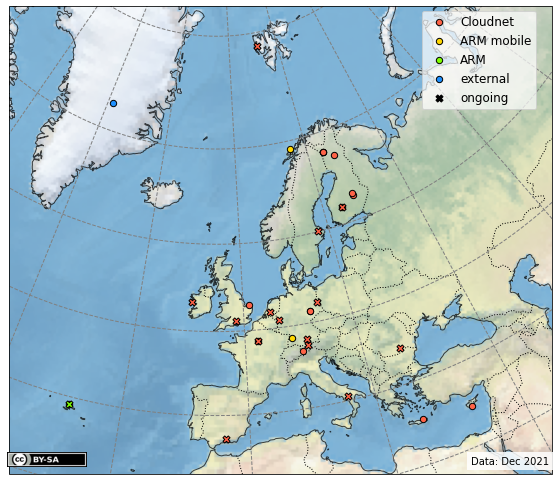

In [68]:
proj = ccrs.PlateCarree()
proj = ccrs.LambertConformal(central_longitude=-5.0, central_latitude=40.0)
#proj = ccrs.Miller()

fig = plt.figure(figsize=(10,7))
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines('50m', alpha=0.7)
ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='gray', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(range(-180, 181, 20))
gl.ylocator = matplotlib.ticker.FixedLocator(range(-90, 91, 10))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

for key, value in sites.items():
    print(key, value['coordinates'])
    if value['coordinates']:

        begin, end = get_actual_dates(value['duration'], dt_until)
        if (dt_until - end) < datetime.timedelta(days=10) and dt_until > begin:
            m = 'X'
            s = 50
            l = ' ongoing'
            zo = 11
        elif dt_until > begin:
            m = 'o'
            s = 40
            l = ''
            zo = 10
        else:
            continue
        if value['network'] == 'cloudnet':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="Cloudnet" + l)
        if value['network'] == 'ARM_mobile':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM mobile"+l)
        if value['network'] == 'ARM':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='chartreuse', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM"+l)
        if value['network'] == 'ARM_ext':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='dodgerblue', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="external"+l)
        
#ax.set_extent([-45, 55, 20, 85], ccrs.PlateCarree())
#ax.set_extent([0, 20, 46, 60], ccrs.PlateCarree())
#ax.set_extent([-15, 0, 46, 60], ccrs.PlateCarree())
ax.set_extent([-35, 45, 33, 80], ccrs.PlateCarree())

ax.text(0.85, 0.02, data_str, fontsize=10, 
        bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'), 
        transform=ax.transAxes)
im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.12, -0.05, 0.11, 0.2], zorder=3)
newax.imshow(im)
newax.axis('off')

handles, labels = ax.get_legend_handles_labels()
print(labels)
new_labels = [labels[labels.index('Cloudnet')], labels[labels.index('ARM mobile')], labels[labels.index('ARM')],
              labels[labels.index('external')], 
              'ongoing']
i = labels.index('Cloudnet ongoing')
handles[i] = copy.copy(handles[labels.index('Cloudnet ongoing')])
handles[i].set_color('black')
new_handles = [handles[labels.index('Cloudnet')], handles[labels.index('ARM mobile')], handles[labels.index('ARM')],
               handles[labels.index('external')], 
               handles[labels.index('Cloudnet ongoing')]]
leg = ax.legend(new_handles, new_labels, loc=(0.76, 0.78), scatterpoints=1, fontsize=12)
leg.get_frame().set_alpha(0.7)

plt.tight_layout()
savepath = 'map_sites_europe.png'
plt.savefig(savepath, dpi=350)

leipzig [51.35341, 12.434639]
leipzig2 [51.35341, 12.434639]
lindenberg [52.2105, 14.13]
juelich [50.9086, 6.4134]
chilbolton [51.144445, -1.438747]
cabauw [51.970383, 4.92625]
mace [53.33, -9.90399]
palaiseau [48.71473, 2.21746]
palaiseau2 [48.71473, 2.21746]
potenza [40.6, 15.72]
sodankyla [67.363152, 26.641922]
hyytiaelae_cloudnet [61.843536, 24.287847]
munich [48.15, 10.98]
barbados [13.162317, -59.428562]
schneeferner [47.42, 10.98]
granada [37.16, -3.61]
norunda [60.1, 17.5]
bucharest [44.348, 26.029]
mindelo [16.878, -24.995]
svalbard [78.925259, 11.913133]
cyprus [34.681573, 33.032084]
Kenttarova1 [67.971146, 24.178303]
Kenttarova2 [67.971146, 24.178303]
Kenttarova3 [67.971146, 24.178303]
finland2 [62.733369, 27.555418]
savilahti [62.89, 27.631]
weybourne [52.95, 1.12]
finokalia [35.34, 25.67]
iquique [-20.54, -70.18]
punta-arenas [-53.1346, -70.8834]
davos [46.836, 9.854]
maido [-21.079, 55.383]
ENA [39.091578, -28.02565]
TWP1 [-2.061011, 147.425397]
TWP2 [-0.521, 166.916]
TWP

<ipython-input-69-ab53c98f1cf0>:73: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


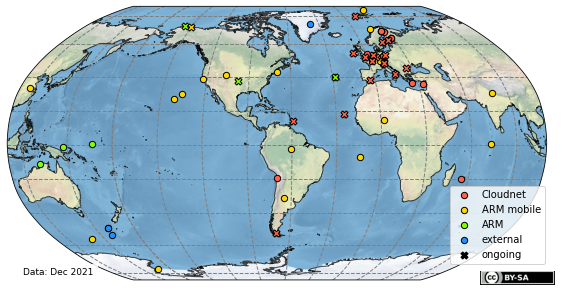

In [69]:
proj = ccrs.PlateCarree()
proj = ccrs.Miller(central_longitude=15.0)
proj = ccrs.Robinson(central_longitude=-70)

fig = plt.figure(figsize=(8,5.5))
ax = plt.axes(projection=proj)
ax.stock_img()
ax.coastlines('50m', alpha=0.7)
#ax.add_feature(cartopy.feature.BORDERS, linestyle=':')

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='gray', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(range(-180, 181, 30))
gl.ylocator = matplotlib.ticker.FixedLocator(range(-101, 101, 20))
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

for key, value in sites.items():
    print(key, value['coordinates'])
    if value['coordinates']:
        begin, end = get_actual_dates(value['duration'], dt_until)
        if (dt_until - end) < datetime.timedelta(days=10) and dt_until > begin:
            m = 'X'
            s = 50
            l = ' ongoing'
            zo = 11
        elif dt_until > begin:
            m = 'o'
            s = 40
            l = ''
            zo = 10
        else:
            continue

        if value['network'] == 'cloudnet':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="Cloudnet" + l)
        if value['network'] == 'ARM_mobile':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM mobile"+l)
        if value['network'] == 'ARM':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='chartreuse', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM"+l)
        if value['network'] == 'ARM_ext':
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='dodgerblue', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="external"+l)
        
ax.text(0.03, 0.02, data_str, fontsize=9, 
        bbox=dict(facecolor='white', alpha=0.85, edgecolor='none'), 
        transform=ax.transAxes)
im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.84, 0.06, 0.13, 0.2], zorder=3)
newax.imshow(im)
newax.axis('off')

handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('Cloudnet')], labels[labels.index('ARM mobile')], labels[labels.index('ARM')],
              labels[labels.index('external')], 'ongoing']
i = labels.index('Cloudnet ongoing')
handles[i] = copy.copy(handles[labels.index('Cloudnet ongoing')])
handles[i].set_color('black')
new_handles = [handles[labels.index('Cloudnet')], handles[labels.index('ARM mobile')], handles[labels.index('ARM')],
               handles[labels.index('external')], handles[labels.index('Cloudnet ongoing')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, loc=(0.82, 0.06))
#leg.get_frame().set_alpha(0.7)

plt.tight_layout()
savepath = 'map_sites_world.png'
plt.savefig(savepath, dpi=350)

In [70]:


def calc_duration(site):

    begin, end = get_actual_dates(site['duration'], dt_until)
    print(begin, end)
    if end > dt_until:
        end = dt_until
    duration = end-begin
    print(site['duration'], begin, end, duration.days/30.4)
    return round(duration.days/30.4)


mod_sites = []
for k,v in sites.items():
    duration = calc_duration(v)
    v.update({'shortname': k, 'dur_months': duration})
    print(k, duration)
    # only add if campaign actually happened
    if duration > 0:
        mod_sites.append(v)

lats = [value['coordinates'][0] for value in mod_sites]
lons = [value['coordinates'][1] for value in mod_sites]
dur_months = [value['dur_months'] for value in mod_sites]
#[print(s['coordinates'], lat, lon) for s, lat, lon in zip(mod_sites, lats, lons)]
#[print(s['dur_months'], m) for s, m in zip(mod_sites, dur_months)]
lon_edges=list(range(-180,186, 30))
lat_edges=list(range(-90,91, 30))
lat_edges=[-90,-65,-23,23,65,90]
lat_edges=[-90,-65,-35,0,35,65,90]
#lat_edges=[-90,-65,-37,-12,12,37,65,90]
print(lon_edges)
print(lat_edges)
ret = scipy.stats.binned_statistic_2d(
    np.array(lons)-5, lats, dur_months, statistic='sum', bins=[lon_edges, lat_edges])

print(ret)

2011-08-11 00:00:00 2016-04-05 00:00:00
['2011-08-11', '2016-04-05'] 2011-08-11 00:00:00 2016-04-05 00:00:00 55.88815789473684
leipzig 56
2018-04-28 00:00:00 2018-09-04 00:00:00
['2018-04-28', '2018-09-04'] 2018-04-28 00:00:00 2018-09-04 00:00:00 4.243421052631579
leipzig2 4
2004-04-01 00:00:00 2021-12-02 00:00:00
['2004-04-01', '0'] 2004-04-01 00:00:00 2021-12-02 00:00:00 212.30263157894737
lindenberg 212
2010-08-21 00:00:00 2021-12-02 00:00:00
['2010-08-21', '0'] 2010-08-21 00:00:00 2021-12-02 00:00:00 135.5592105263158
juelich 136
1999-05-01 00:00:00 2021-12-02 00:00:00
['1999-05', '0'] 1999-05-01 00:00:00 2021-12-02 00:00:00 271.4144736842105
chilbolton 271
2001-08-08 00:00:00 2021-12-02 00:00:00
['2001-08-08', '0'] 2001-08-08 00:00:00 2021-12-02 00:00:00 244.11184210526318
cabauw 244
2009-02-23 00:00:00 2021-12-02 00:00:00
['2009-02-23', '0'] 2009-02-23 00:00:00 2021-12-02 00:00:00 153.45394736842107
mace 153
2003-01-06 00:00:00 2004-09-13 00:00:00
['2003-01-06', '2004-09-13'] 200

[-165. -135. -105.  -75.  -45.  -15.   15.   45.   75.  105.  135.  165.]
[-77.5 -50.  -17.5  17.5  50.   77.5]
0 [51.35341, 12.434639]
1 [51.35341, 12.434639]
2 [52.2105, 14.13]
3 [50.9086, 6.4134]
4 [51.144445, -1.438747]
5 [51.970383, 4.92625]
6 [53.33, -9.90399]
7 [48.71473, 2.21746]
8 [48.71473, 2.21746]
9 [40.6, 15.72]
10 [67.363152, 26.641922]
11 [61.843536, 24.287847]
12 [48.15, 10.98]
13 [13.162317, -59.428562]
14 [47.42, 10.98]
15 [37.16, -3.61]
16 [60.1, 17.5]
17 [44.348, 26.029]
18 [16.878, -24.995]
19 [78.925259, 11.913133]
20 [34.681573, 33.032084]
21 [67.971146, 24.178303]
22 [67.971146, 24.178303]
23 [67.971146, 24.178303]
24 [62.733369, 27.555418]
25 [62.89, 27.631]
26 [52.95, 1.12]
27 [35.34, 25.67]
28 [-20.54, -70.18]
29 [-53.1346, -70.8834]
30 [46.836, 9.854]
31 [-21.079, 55.383]
32 [39.091578, -28.02565]
33 [-2.061011, 147.425397]
34 [-0.521, 166.916]
35 [-12.4246, 130.891597]
36 [36.605, -97.485]
37 [71.323258, -156.61575]
38 [-7.966964, -14.349806]
39 [-77.849611

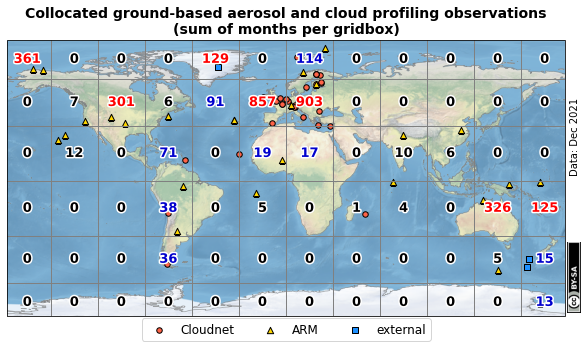

In [71]:
import matplotlib.patheffects as path_effects

x_mid = ret.x_edge[:-1] + np.diff(ret.x_edge)/2.
y_mid = ret.y_edge[:-1] + np.diff(ret.y_edge)/2.
print(x_mid)
print(y_mid)

proj = ccrs.PlateCarree(central_longitude=5)

fig = plt.figure(figsize=(10,5.5))
ax = plt.axes(projection=proj)
#ax.pcolormesh(ret.x_edge, ret.y_edge, np.transpose(ret.statistic), 
#              cmap='Wistia', transform=ccrs.PlateCarree())

#ax.stock_img()
ax.coastlines('50m', alpha=0.7, color='grey', linewidth=0.7)
#ax.scatter(lons, lats, marker='.', s=40, color='darkviolet', transform=ccrs.Geodetic(), label='station')
for key, value in enumerate(mod_sites):
    print(key, value['coordinates'])
    if value['coordinates']:
#         dt_end = True if value['duration'][1] == '0' else (
#             datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2018,1,1))
        zo = 2
        color='darkviolet'
        if value['network'] == 'cloudnet':
            m = 'o'
            s = 30
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="Cloudnet")
        if value['network'] == 'ARM_mobile':
            m = '^'
            s = 40
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM mobile")
        if value['network'] == 'ARM':
            m = '^'
            s = 40
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='gold', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="ARM")
            
        if value['network'] == 'ARM_ext':
            m = 's'
            s = 30
            ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                       facecolor='dodgerblue', edgecolor='black', s=s, zorder=zo,
                       transform=ccrs.PlateCarree(), label="external")

ax.stock_img()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='-', color='grey', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(np.array(lon_edges)+5)
gl.ylocator = matplotlib.ticker.FixedLocator(lat_edges)

datapoints = []
for i in range(x_mid.shape[0]):
    for j in range(y_mid.shape[0]):
        #print(x_mid[i], y_mid[j], ret.statistic[i,j])
        dur_sum = ret.statistic[i,j]
        if dur_sum > 120:
            c = 'red'
        elif dur_sum > 12:
            c = 'mediumblue'
        else:
            c = 'black'
        
        t = ax.text(x_mid[i]+5, y_mid[j], int(ret.statistic[i,j]),
                    fontweight='bold', color=c, fontsize=13,
                    horizontalalignment='center', verticalalignment='center',
                    transform=ccrs.Geodetic())
        t.set_path_effects([path_effects.withStroke(linewidth=3, foreground='w')])
ax.set_title("Collocated ground-based aerosol and cloud profiling observations\n(sum of months per gridbox)", 
             fontweight='semibold', fontsize=14)

im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.812, 0.16, 0.2, 0.18], zorder=3)
newax.imshow(np.rot90(im))
newax.axis('off')

ax.text(1.0175, 0.515, data_str, fontsize=10, 
        bbox=dict(facecolor='none', alpha=0.85, edgecolor='none'), transform=ax.transAxes, 
        rotation=90, verticalalignment='baseline', horizontalalignment='center')
# ax.text(0.6, 0.02, 'Data: Jan 2018; Visualisation: @martin_ra_', fontsize=10, 
#         bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)


handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('Cloudnet')], labels[labels.index('ARM')],
              labels[labels.index('external')]]
new_handles = [handles[labels.index('Cloudnet')], handles[labels.index('ARM')],
               handles[labels.index('external')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, 
                ncol=3, loc='center',
                bbox_to_anchor=(0.5, -0.05), framealpha=0.8, fontsize=12)

#plt.tight_layout()
savepath = fn_prefix+'map_profiling_observations_month_sum_network.png'
plt.savefig(savepath, dpi=350)

[-165. -135. -105.  -75.  -45.  -15.   15.   45.   75.  105.  135.  165.]
[-77.5 -50.  -17.5  17.5  50.   77.5]
0 [51.35341, 12.434639]
1 [51.35341, 12.434639]
2 [52.2105, 14.13]
3 [50.9086, 6.4134]
4 [51.144445, -1.438747]
5 [51.970383, 4.92625]
6 [53.33, -9.90399]
7 [48.71473, 2.21746]
8 [48.71473, 2.21746]
9 [40.6, 15.72]
10 [67.363152, 26.641922]
11 [61.843536, 24.287847]
12 [48.15, 10.98]
13 [13.162317, -59.428562]
14 [47.42, 10.98]
15 [37.16, -3.61]
16 [60.1, 17.5]
17 [44.348, 26.029]
18 [16.878, -24.995]
19 [78.925259, 11.913133]
20 [34.681573, 33.032084]
21 [67.971146, 24.178303]
22 [67.971146, 24.178303]
23 [67.971146, 24.178303]
24 [62.733369, 27.555418]
25 [62.89, 27.631]
26 [52.95, 1.12]
27 [35.34, 25.67]
28 [-20.54, -70.18]
29 [-53.1346, -70.8834]
30 [46.836, 9.854]
31 [-21.079, 55.383]
32 [39.091578, -28.02565]
33 [-2.061011, 147.425397]
34 [-0.521, 166.916]
35 [-12.4246, 130.891597]
36 [36.605, -97.485]
37 [71.323258, -156.61575]
38 [-7.966964, -14.349806]
39 [-77.849611

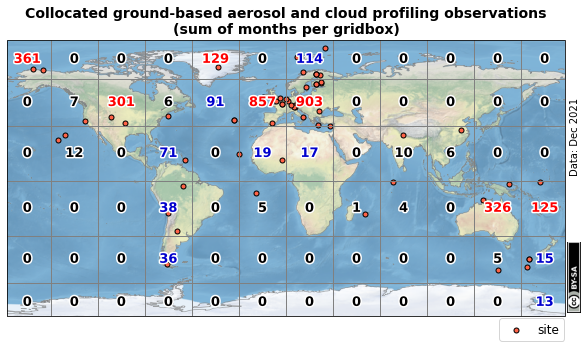

In [72]:
import matplotlib.patheffects as path_effects

x_mid = ret.x_edge[:-1] + np.diff(ret.x_edge)/2.
y_mid = ret.y_edge[:-1] + np.diff(ret.y_edge)/2.
print(x_mid)
print(y_mid)

proj = ccrs.PlateCarree(central_longitude=5)

fig = plt.figure(figsize=(10,5.5))
ax = plt.axes(projection=proj)
#ax.pcolormesh(ret.x_edge, ret.y_edge, np.transpose(ret.statistic), 
#              cmap='Wistia', transform=ccrs.PlateCarree())

#ax.stock_img()
ax.coastlines('50m', alpha=0.7, color='grey', linewidth=0.7)
#ax.scatter(lons, lats, marker='.', s=40, color='darkviolet', transform=ccrs.Geodetic(), label='station')
for key, value in enumerate(mod_sites):
    print(key, value['coordinates'])
    if value['coordinates']:
#         dt_end = True if value['duration'][1] == '0' else (
#             datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2018,1,1))
        zo = 2
        color='darkviolet'
        m = 'o'
        s = 25
        ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                   facecolor='tomato', edgecolor='black', s=s, zorder=zo,
                   transform=ccrs.PlateCarree(), label="site")


ax.stock_img()

gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='-', color='grey', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
gl.xlocator = matplotlib.ticker.FixedLocator(np.array(lon_edges)+5)
gl.ylocator = matplotlib.ticker.FixedLocator(lat_edges)

datapoints = []
for i in range(x_mid.shape[0]):
    for j in range(y_mid.shape[0]):
        #print(x_mid[i], y_mid[j], ret.statistic[i,j])
        dur_sum = ret.statistic[i,j]
        if dur_sum > 120:
            c = 'red'
        elif dur_sum > 12:
            c = 'mediumblue'
        else:
            c = 'black'
        
        t = ax.text(x_mid[i]+5, y_mid[j], int(ret.statistic[i,j]),
                    fontweight='bold', color=c, fontsize=13,
                    horizontalalignment='center', verticalalignment='center',
                    transform=ccrs.Geodetic())
        t.set_path_effects([path_effects.withStroke(linewidth=3, foreground='w')])
ax.set_title("Collocated ground-based aerosol and cloud profiling observations\n(sum of months per gridbox)", 
             fontweight='semibold', fontsize=14)

im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.812, 0.16, 0.2, 0.18], zorder=3)
newax.imshow(np.rot90(im))
newax.axis('off')

ax.text(1.0175, 0.515, data_str, fontsize=10, 
        bbox=dict(facecolor='none', alpha=0.85, edgecolor='none'), transform=ax.transAxes, 
        rotation=90, verticalalignment='baseline', horizontalalignment='center')
# ax.text(0.6, 0.02, 'Data: Jan 2018; Visualisation: @martin_ra_', fontsize=10, 
#         bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)


handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('site')]]
new_handles = [handles[labels.index('site')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, 
                ncol=3, loc='center',
                bbox_to_anchor=(0.94, -0.05), framealpha=0.8, fontsize=12)

#plt.tight_layout()
savepath = fn_prefix+'map_profiling_observations_month_sum.png'
plt.savefig(savepath, dpi=350)

In [73]:
print(mod_sites[0].keys())

coord_array = np.array([value['coordinates'] for value in mod_sites])
# lats = [value['coordinates'][0] for value in mod_sites]
# lons = [value['coordinates'][1] for value in mod_sites]
# dur_months = [value['dur_months'] for value in mod_sites]
#print(coord_array)

dict_keys(['location', 'coordinates', 'institution', 'network', 'duration', 'shortname', 'dur_months'])


In [74]:
def distance(origin, destination):
    "use the ‘haversine’ formula to calculate the great-circle distance between two points"
    
    lat1, lon1 = origin
    lat2, lon2 = destination
    radius = 6371 # km

    dlat = math.radians(lat2-lat1)
    dlon = math.radians(lon2-lon1)
    a = math.sin(dlat/2) * math.sin(dlat/2) + math.cos(math.radians(lat1)) \
        * math.cos(math.radians(lat2)) * math.sin(dlon/2) * math.sin(dlon/2)
    c = 2 * math.atan2(math.sqrt(a), math.sqrt(1-a))
    d = radius * c

#     print(origin, destination, d)
    return d

In [75]:
from itertools import groupby
from sklearn.cluster import DBSCAN


clustering = DBSCAN(eps=1000, metric=distance, min_samples=1).fit(coord_array)
print('clusters ', clustering.labels_)
unique, counts = np.unique(clustering.labels_, return_counts=True)
print('number of multi-element clusters ', np.sum(counts != 1))

colorcycle = ["lawngreen", "dodgerblue", "mediumvioletred", "orangered", "blue", "orange", "maroon"]
cmap = matplotlib.cm.get_cmap("turbo", np.sum(counts != 1))
# mcolors.rgb2hex(mycmap(i))
colorcycle = [cmap(i) for i in range(cmap.N)]

cluster_props = []
for i in unique:
    
    station_ids = np.where(clustering.labels_ == i)[0].tolist()
    sites_in_cluster = [mod_sites[i] for i in station_ids]
    station_names = [v['location'] for v in sites_in_cluster]
    center_lat = np.mean([value['coordinates'][0] for value in sites_in_cluster])
    center_lon = np.mean([value['coordinates'][1] for value in sites_in_cluster])
    duration = np.sum(np.array([value['dur_months'] for value in sites_in_cluster]))
    
    # adapt the plot coordinates for some selected stations
    #
    plot_coords = (center_lat+5, center_lon+5)
    if center_lat > 75 and len(station_names) == 1:
        plot_coords = (center_lat-5, center_lon-6)
    if center_lat > 75 and len(station_names) > 1:
        plot_coords = (center_lat-2, center_lon)
    #if 'Point Reyes' in station_names:
    #    plot_coords = (center_lat-4, center_lon+5)
    if set(['Cabauw', 'Leipzig', 'Lindenberg', 'Chilbolton', 'Jülich', 'Palaiseau']) < set(station_names):
        plot_coords = (center_lat-5, center_lon+5)
    if ['Granada'] == station_names:
        plot_coords = (center_lat-5, center_lon+5)
    if 'Limassol' in station_names:
        plot_coords = (center_lat-7, center_lon+5)
    if 'Tropical Western Pacific Naru' in station_names:
        plot_coords = (center_lat-8, center_lon+3)
    
    print('cluster ', i, center_lat, center_lon, duration)
    if len(station_names) > 1:
        color = colorcycle.pop()
        marker = 's'
        label = None
    else:
        color = 'dimgrey'
        marker = 'o'
        label = 'site'
    print('members ', station_names, color)
    cluster_props.append({'dur_months': duration, 'center_coords': (center_lat, center_lon),
                          'plot_coords': plot_coords, "color":color, "marker": marker, 'label': label,
                          'sites': sites_in_cluster})
    

clusters  [ 0  0  0  0  0  0  0  0  0  0  0  0  0  1  0  2  0  0  3  4  5  0  0  0
  0  0  0  5  6  7  0  8  9 10 11 12 13 14 15 16  0 17 14 18 19 20 13  9
 21  0 22 23 24 25 26 26 27 25 25 28  4  0]
number of multi-element clusters  8
cluster  0 55.32201111538462 13.9474585 1752
members  ['Leipzig', 'Leipzig', 'Lindenberg', 'Jülich', 'Chilbolton', 'Cabauw', 'Mace-Head', 'Palaiseau', 'Palaiseau', 'Potenza', 'Sodankyla', 'Hyytiälä', 'Munich', 'Schneefernerhaus', 'Norunda', 'Bucharest', 'Kenttarova', 'Kenttarova', 'Kenttarova', 'Vehmasmaki', 'Savilahti', 'Weybourne', 'Davos', 'Hyytiälä', 'Black Forest', 'Andoya'] (0.4796, 0.01583, 0.01055, 1.0)
cluster  1 13.162317 -59.428562 71
members  ['Deebles Point'] dimgrey
cluster  2 37.16 -3.61 43
members  ['Granada'] dimgrey
cluster  3 16.878 -24.995 3
members  ['Mindelo'] dimgrey
cluster  4 81.96262949999999 20.9565665 78
members  ['Ny-Ålesund', 'MOSAiC'] (0.8538, 0.2217, 0.02677, 1.0)
cluster  5 35.0107865 29.351042 18
members  ['Limassol', 'F

0 [51.35341, 12.434639]
leipzig 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site leipzig
1 [51.35341, 12.434639]
leipzig2 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site leipzig2
2 [52.2105, 14.13]
lindenberg 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site lindenberg
3 [50.9086, 6.4134]
juelich 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site juelich
4 [51.144445, -1.438747]
chilbolton 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site chilbolton
5 [51.970383, 4.92625]
cabauw 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site cabauw
6 [53.33, -9.90399]
mace 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site mace
7 [48.71473, 2.21746]
palaiseau 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site palaiseau
8 [48.71473, 2.21746]
palaiseau2 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site palaiseau2
9 [40.6, 15.72]
potenza 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site potenza
10 [67.363152, 26.641922]
sodankyla 0 (0.4796, 0.01583, 0.01055, 1.0)
selected site sodankyla
11 [61.843536, 24.287847]
hyytiaela

/home/martin/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:324: UserWarning: The .xlabels_top attribute is deprecated. Please use .top_labels to toggle visibility instead.
  warnings.warn('The .xlabels_top attribute is deprecated. Please '
/home/martin/.local/lib/python3.8/site-packages/cartopy/mpl/gridliner.py:348: UserWarning: The .ylabels_left attribute is deprecated. Please use .left_labels to toggle visibility instead.
  warnings.warn('The .ylabels_left attribute is deprecated. Please '


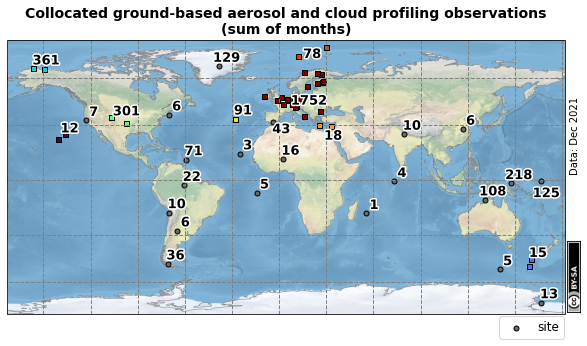

In [76]:
proj = ccrs.PlateCarree(central_longitude=5)

fig = plt.figure(figsize=(10,5.5))
ax = plt.axes(projection=proj)

def get_cluster(cluster_props, site):
    for i, v in enumerate(cluster_props):
        if site in [s['shortname'] for s in v['sites']]:
            print(site, i, v['color'])
            return v['color'], v['marker'], v["label"]


ax.coastlines('50m', alpha=0.7, color='grey', linewidth=0.7)
#ax.scatter(lons, lats, marker='.', s=40, color='darkviolet', transform=ccrs.Geodetic(), label='station')
for key, value in enumerate(mod_sites):
    print(key, value['coordinates'])
    key = value['shortname']
    if value['coordinates']:
#         dt_end = True if value['duration'][1] == '0' else (
#             datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2018,1,1))
        zo = 2
        c, m, label = get_cluster(cluster_props, key)
        s = 25
        print("selected site", key)
        ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                   facecolor=c, edgecolor='black', s=s, zorder=zo,
                   transform=ccrs.PlateCarree(), label=label)

ax.stock_img()
gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='gray', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
lat_edges=[-90,-65,-35,0,35,65,90]
gl.xlocator = matplotlib.ticker.FixedLocator(range(-180, 181, 30))
#gl.ylocator = matplotlib.ticker.FixedLocator(range(-90, 91, 30))
gl.ylocator = matplotlib.ticker.FixedLocator(lat_edges)
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

ax.set_extent([-173, 182, -85, 89], ccrs.PlateCarree())

for e in cluster_props:
#     if e['dur_months'] > 120:
#         c = 'red'
#     elif e['dur_months'] > 12:
#         c = 'mediumblue'
#     else:
#        c = 'black'
    c = 'black'
    t = ax.text(e['plot_coords'][1], e['plot_coords'][0], int(e['dur_months']),
            fontweight='bold', color=c, fontsize=13,
            horizontalalignment='center', verticalalignment='center',
            transform=ccrs.Geodetic())  
    t.set_path_effects([path_effects.withStroke(linewidth=3, foreground='w')])     

ax.set_title("Collocated ground-based aerosol and cloud profiling observations\n(sum of months)", 
             fontweight='semibold', fontsize=14)

im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.812, 0.16, 0.2, 0.18], zorder=3)
newax.imshow(np.rot90(im))
newax.axis('off')

ax.text(1.0175, 0.515, data_str, fontsize=10, 
        bbox=dict(facecolor='none', alpha=0.85, edgecolor='none'), transform=ax.transAxes, 
        rotation=90, verticalalignment='baseline', horizontalalignment='center')
# ax.text(0.6, 0.02, 'Data: Jan 2018; Visualisation: @_martin_rdz_', fontsize=10, 
#         bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)


handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('site')]]
new_handles = [handles[labels.index('site')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, 
                ncol=3, loc='center',
                bbox_to_anchor=(0.94, -0.05), framealpha=0.8, fontsize=12)

#plt.tight_layout()
savepath = fn_prefix+'map_profiling_observations_month_sum_cluster.png'
plt.savefig(savepath, dpi=350)

['Leipzig', 'Leipzig', 'Lindenberg', 'Jülich', 'Chilbolton', 'Cabauw', 'Mace-Head', 'Palaiseau', 'Palaiseau', 'Potenza', 'Sodankyla', 'Hyytiälä', 'Munich', 'Schneefernerhaus', 'Norunda', 'Bucharest', 'Kenttarova', 'Kenttarova', 'Kenttarova', 'Vehmasmaki', 'Savilahti', 'Weybourne', 'Davos', 'Hyytiälä', 'Black Forest', 'Andoya']
['Deebles Point']
['Granada']
['Mindelo']
['Ny-Ålesund', 'MOSAiC']
yeah mosaic
['Limassol', 'Finokalia']
['Iquique']
['Punta Arenas']
['Maido Observatory']
['Eastern North Atlantic', 'Graciosa Island']
['Tropical Western Pacific Manus']
['Tropical Western Pacific Naru']
['Tropical Western Pacific Darwin']
['Southern Great Plains', 'Steamboat Springs']
['North Slope of Alaska', 'Oliktok Point']
['Ascension Island']
['McMurdo']
['Manacapuru']
['Cape Cod']
['Gan Island, Maldives']
['Ganges Valley']
['Shouxian']
['Niamey']
['Point Reyes']
['Summit Station']
['Macquarie Island', 'Hobart - Ant', 'Hobart - Ant']
['Los Angeles - Honolulu', 'Perl Harbor - San Francisco']


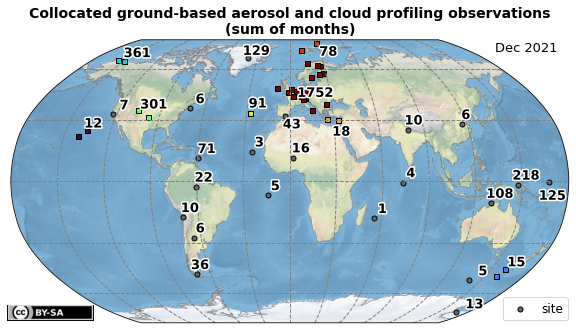

In [77]:
proj = ccrs.PlateCarree(central_longitude=15)

fig = plt.figure(figsize=(10,5.5))
proj = ccrs.Robinson(central_longitude=0)
ax = plt.axes(projection=proj)

ax.stock_img()

def get_cluster(cluster_props, site):
    for i, v in enumerate(cluster_props):
        if site in [s['shortname'] for s in v['sites']]:
            return v['color'], v['marker'], v["label"]


ax.coastlines('50m', alpha=0.7, color='grey', linewidth=0.7)
#ax.scatter(lons, lats, marker='.', s=40, color='darkviolet', transform=ccrs.Geodetic(), label='station')
for key, value in enumerate(mod_sites):
    key = value['shortname']
    if value['coordinates']:
#         dt_end = True if value['duration'][1] == '0' else (
#             datetime.datetime.strptime(value['duration'][1], '%Y-%m') > datetime.datetime(2018,1,1))
        zo = 2
        c, m, label = get_cluster(cluster_props, key)
        s = 25
#         print("selected site", key)
        ax.scatter(value['coordinates'][1], value['coordinates'][0], marker=m,
                   facecolor=c, edgecolor='black', s=s, zorder=zo,
                   transform=ccrs.PlateCarree(), label=label)


gl = ax.gridlines(crs=ccrs.PlateCarree(), draw_labels=False, linestyle='--', color='gray', linewidth=1.)
gl.xlabels_top = False
gl.ylabels_left = False
lat_edges=[-90,-65,-35,0,35,65,90]
gl.xlocator = matplotlib.ticker.FixedLocator(range(-180, 181, 30))
#gl.ylocator = matplotlib.ticker.FixedLocator(range(-90, 91, 30))
gl.ylocator = matplotlib.ticker.FixedLocator(lat_edges)
gl.xformatter = cartopy.mpl.gridliner.LONGITUDE_FORMATTER
gl.yformatter = cartopy.mpl.gridliner.LATITUDE_FORMATTER

for e in cluster_props:
#     if e['dur_months'] > 120:
#         c = 'red'
#     elif e['dur_months'] > 12:
#         c = 'mediumblue'
#     else:
#        c = 'black'
    c = 'black'
    sites_cl = [s['location'] for s in e['sites']]
    print(sites_cl)
    lat, lon = e['plot_coords']
    if 'MOSAiC' in sites_cl:
        print('yeah mosaic')
        lon += 17
        lat -= 3
    t = ax.text(lon, lat, int(e['dur_months']),
            fontweight='bold', color=c, fontsize=13,
            horizontalalignment='center', verticalalignment='center',
            transform=ccrs.Geodetic())  
    t.set_path_effects([path_effects.withStroke(linewidth=3, foreground='w')])     

ax.set_title("Collocated ground-based aerosol and cloud profiling observations\n(sum of months)", 
             fontweight='semibold', fontsize=14)

im = matplotlib.image.imread('cc-botton-by-sa.png')
newax = fig.add_axes([0.12, 0.12, 0.12, 0.1], zorder=3)
# newax.imshow(np.rot90(im))
newax.imshow(im)
newax.axis('off')

ax.set_global()

date_str = dt_until.strftime('%b %Y')
ax.text(0.98, 0.96, date_str, fontsize=13, 
        bbox=dict(facecolor='none', alpha=0.85, edgecolor='none'), transform=ax.transAxes, 
        rotation=0, verticalalignment='baseline', horizontalalignment='right')
# ax.text(0.6, 0.02, 'Data: Jan 2018; Visualisation: @_martin_rdz_', fontsize=10, 
#         bbox=dict(facecolor='white', alpha=0.7), transform=ax.transAxes)


handles, labels = ax.get_legend_handles_labels()
new_labels = [labels[labels.index('site')]]
new_handles = [handles[labels.index('site')]]
#leg = ax.legend(new_handles, new_labels, loc=(0.74, 0.8), scatterpoints=1)
leg = ax.legend(new_handles, new_labels, scatterpoints=1, 
                ncol=3, loc='center',
                bbox_to_anchor=(0.94, 0.05), framealpha=0.8, fontsize=12)

#plt.tight_layout()
savepath = fn_prefix+'map_profiling_observations_month_sum_cluster_robin.png'
plt.savefig(savepath, dpi=350)
print(savepath)

In [78]:
def calc_duration(site, du):

    begin, end = get_actual_dates(site['duration'], du)
    #print(begin, end)
    if end > du:
        end = du
    duration = end-begin
    #print(site['duration'], begin, end, duration.days/30.4)
    return round(duration.days/30.4)


In [79]:
from dateutil.rrule import rrule, MONTHLY

a = datetime.datetime(2000, 1, 1)
b = datetime.datetime(2021, 12, 2)

# a = datetime.datetime(2021, 10, 1)
# b = datetime.datetime(2021, 12, 2)

dts = []
durs = []
durs_NH_HL = []
durs_NH_ML = []
durs_NH_LL = []
durs_SH_LL = []
durs_SH_ML = []
durs_SH_HL = []

no_sites = []
no_sites_NH_ML = []
no_sites_SH_ML = []
active_sites = []

for dt in rrule(MONTHLY, dtstart=a, until=b):
    
    mod_sites = []
    for k,v in sites.items():
        duration = calc_duration(v, dt)
        v.update({'shortname': k, 'dur_months': duration})
        #print(k, duration)
        # only add if campaign actually happened
        if duration > 0:
            mod_sites.append(v)
#     print(mod_sites)
    cum_duration = np.sum([s['dur_months'] for s in mod_sites])
    
    #                max to omit negative vals
    d_NHHL = np.sum([max(0, calc_duration(v, dt)) for v in sites.values() \
                     if 65 < v['coordinates'][0]])
    d_NHML = np.sum([max(0, calc_duration(v, dt)) for v in sites.values() \
                     if 35 < v['coordinates'][0] < 65])
    d_NHLL = np.sum([max(0, calc_duration(v, dt)) for v in sites.values() \
                     if 0 < v['coordinates'][0] < 35])
    d_SHLL = np.sum([max(0, calc_duration(v, dt)) for v in sites.values() \
                     if -35 < v['coordinates'][0] < 0])
    d_SHML = np.sum([max(0, calc_duration(v, dt)) for v in sites.values() \
                     if -65 < v['coordinates'][0] < -35])
    d_SHHL = np.sum([max(0, calc_duration(v, dt)) for v in sites.values() \
                     if v['coordinates'][0] < -65])
    
    
    def activecheck(dur, dt):
        already_started = dur[0] <= dt
        cont = dur[1] == dt and already_started
        incamp = dur[1] >= dt and already_started
        return cont or incamp
        
    
    act_sites = [s['shortname'] for s in mod_sites \
                 if activecheck(get_actual_dates(s['duration'], dt), dt)]
    act_s_NHML = [s['shortname'] for s in mod_sites \
                  if (activecheck(get_actual_dates(s['duration'], dt), dt)
                      and 35 < s['coordinates'][0] < 65)]
    act_s_SHML = [s['shortname'] for s in mod_sites \
                  if (activecheck(get_actual_dates(s['duration'], dt), dt)
                      and -65 < s['coordinates'][0] < -35)]
    #print(dt.strftime("%Y-%m-%d"), ' dur ', cum_duration, 'active', len(act_sites))

    dts.append(dt)
    durs.append(cum_duration)
    durs_NH_HL.append(d_NHHL)
    durs_NH_ML.append(d_NHML)
    durs_NH_LL.append(d_NHLL)
    durs_SH_LL.append(d_SHLL)
    durs_SH_ML.append(d_SHML)
    durs_SH_HL.append(d_SHHL)
    
    no_sites.append(len(act_sites))
    no_sites_NH_ML.append(len(act_s_NHML))
    no_sites_SH_ML.append(len(act_s_SHML))
    active_sites.append(act_sites)
    

for dt, s_p, s_n in zip(dts[1:], active_sites[:-1], active_sites[1:]):
    print(dt.strftime("%Y-%m-%d"), f"{len(s_n):4}", ' - ', set(s_p) - set(s_n))
    print(f"               ", ' + ', set(s_n) - set(s_p))



2000-02-01    5  -  set()
                 +  set()
2000-03-01    5  -  set()
                 +  set()
2000-04-01    5  -  set()
                 +  set()
2000-05-01    5  -  set()
                 +  set()
2000-06-01    5  -  set()
                 +  set()
2000-07-01    5  -  set()
                 +  set()
2000-08-01    5  -  set()
                 +  set()
2000-09-01    5  -  set()
                 +  set()
2000-10-01    5  -  set()
                 +  set()
2000-11-01    5  -  set()
                 +  set()
2000-12-01    5  -  set()
                 +  set()
2001-01-01    5  -  set()
                 +  set()
2001-02-01    5  -  set()
                 +  set()
2001-03-01    5  -  set()
                 +  set()
2001-04-01    5  -  set()
                 +  set()
2001-05-01    5  -  set()
                 +  set()
2001-06-01    5  -  set()
                 +  set()
2001-07-01    5  -  set()
                 +  set()
2001-08-01    5  -  set()
                 +  set()
2001-09-01  

2017-02-01   21  -  set()
                 +  {'munich'}
2017-03-01   20  -  {'ascension'}
                 +  set()
2017-04-01   20  -  {'marcus'}
                 +  {'weybourne'}
2017-05-01   19  -  {'MICRE'}
                 +  set()
2017-06-01   19  -  set()
                 +  set()
2017-07-01   19  -  set()
                 +  set()
2017-08-01   18  -  {'weybourne'}
                 +  set()
2017-09-01   18  -  set()
                 +  set()
2017-10-01   19  -  set()
                 +  {'Kenttarova2'}
2017-11-01   19  -  set()
                 +  set()
2017-12-01   19  -  set()
                 +  set()
2018-01-01   18  -  {'Kenttarova2'}
                 +  set()
2018-02-01   19  -  set()
                 +  {'capricorn2'}
2018-03-01   18  -  {'capricorn2'}
                 +  set()
2018-04-01   17  -  {'cyprus'}
                 +  set()
2018-05-01   18  -  set()
                 +  {'iquique'}
2018-06-01   20  -  set()
                 +  {'leipzig2', 'granada'}
2018-07-01 

In [80]:
durs_NH = np.array([durs_NH_LL, durs_NH_ML, durs_NH_HL]) 
durs_SH = np.array([durs_SH_LL, durs_SH_ML, durs_SH_HL])

print(durs_NH.shape)
print('NH', durs_NH[:,-1])
print('NH', durs_NH[:,-1]/12)
print('SH', durs_SH[:,-1])
print('SH', durs_SH[:,-1]/12)

(3, 264)
NH [ 135 2165  604]
NH [ 11.25       180.41666667  50.33333333]
SH [499  56  13]
SH [41.58333333  4.66666667  1.08333333]


[-150. -100.  -50.    0.   50.  100.  150.  200.  250.  300.]


<ipython-input-81-743a292ac5bf>:59: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['{0:.0f}'.format(abs(y)) for y in labels])


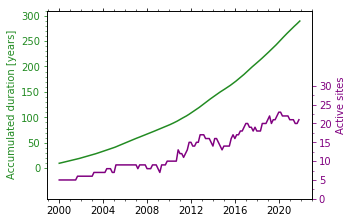

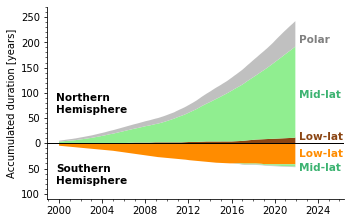

In [81]:
fig, ax = plt.subplots(figsize=(5, 3.2))

c1 = 'forestgreen'
ax.plot(dts, np.array(durs)/12, c1)

ax.set_ylabel('Accumulated duration [years]', color=c1)
ax.set_yticks(np.arange(0, 320, 50))
ax.set_ylim([-60, 310])
ax.tick_params(axis='y', which='both', colors=c1)

c2 = 'purple'
ax2 = ax.twinx()
ax2.plot(np.array(dts)[::2], np.array(no_sites)[::2], c2)

ax2.set_ylabel('Active sites', color=c2)
ax2.set_yticks(np.arange(0, 31, 5))
ax2.set_ylim([0, 50])
ax2.tick_params(axis='y', which='both', colors=c2)

# ax.set_xlim(right=datetime.datetime(2025,1,1))

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
#ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(np.arange(0,311,10)))

ax2.yaxis.set_minor_locator(matplotlib.ticker.FixedLocator(np.arange(0,31,2.5)))
# ax.tick_params(axis='both', which='major', direction='in',
#                top=True, right=True,
#                width=1.5, length=5, labelsize=12)
ax.tick_params(axis='x', which='both',
               top=True)
# ax.tick_params(axis='both', which='minor', direction='in', 
#                top=True, right=True,
#                width=1.5, length=2.5)
#ax.legend(fontsize=11)
plt.tight_layout()
fname = 'time_series.png'
plt.savefig(fname, dpi=250)


#
# ===============================================
#

colors = ['saddlebrown', 'lightgreen', 'silver']
colors_SH = ['darkorange', 'lightgreen', 'silver']

fig, ax = plt.subplots(figsize=(5, 3.2))

# ax.axhline(0, color='dimgrey', lw=1)
ax.stackplot(dts, durs_NH/12, colors=colors)
ax.stackplot(dts, -durs_SH/12, colors=colors_SH)
ax.axhline(0, color='black', lw=1)

ax.set_xlim(right=datetime.datetime(2026,6,1))
ax.set_ylim(-110, 270)
print(ax.get_yticks())
labels = ax.get_yticks()
ax.set_yticklabels(['{0:.0f}'.format(abs(y)) for y in labels])

ax.set_ylabel('Accumulated duration [years]')

ax.xaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())
ax.yaxis.set_minor_locator(matplotlib.ticker.AutoMinorLocator())

ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)

ax.text(0.03, 0.45, "Northern\nHemisphere", fontsize=10.5,
        fontweight='semibold',
        transform=ax.transAxes,
        verticalalignment='baseline', horizontalalignment='left')

ax.text(0.03, 0.08, "Southern\nHemisphere", fontsize=10.5,
        fontweight='semibold',
        transform=ax.transAxes,
        verticalalignment='baseline', horizontalalignment='left')

leg_dt = datetime.datetime(2022,4,1)
ax.text(leg_dt, 200, "Polar", fontsize=10.5, color='grey',
        fontweight='semibold', transform=ax.transData,
        verticalalignment='baseline', horizontalalignment='left')
ax.text(leg_dt, 90, "Mid-lat", fontsize=10.5, color='mediumseagreen',
        fontweight='semibold', transform=ax.transData,
        verticalalignment='baseline', horizontalalignment='left')
ax.text(leg_dt, 7, "Low-lat", fontsize=10.5, color='saddlebrown',
        fontweight='semibold', transform=ax.transData,
        verticalalignment='baseline', horizontalalignment='left')
ax.text(leg_dt, -27, "Low-lat", fontsize=10.5, color='darkorange',
        fontweight='semibold', transform=ax.transData,
        verticalalignment='baseline', horizontalalignment='left')
ax.text(leg_dt, -55, "Mid-lat", fontsize=10.5, color='mediumseagreen',
        fontweight='semibold', transform=ax.transData,
        verticalalignment='baseline', horizontalalignment='left')

plt.tight_layout()
fname = 'time_series_lat_bins'
plt.savefig(fname + '.png', dpi=250)
plt.savefig(fname + '.svg', dpi=250)